Vector quantization (color)

Propósito: reducor el costo de almacenamiento y transmisión.

Usa K-means para agrupar colores similares en k-clústers.

/tmp/ipykernel_610003/95074218.py:12: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = face(gray=True)


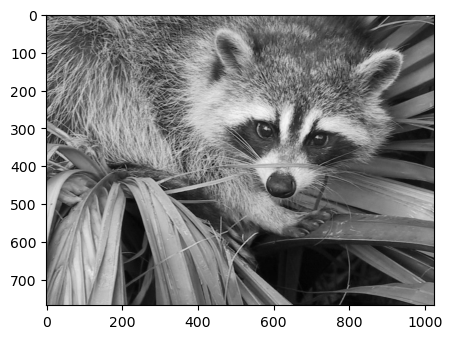

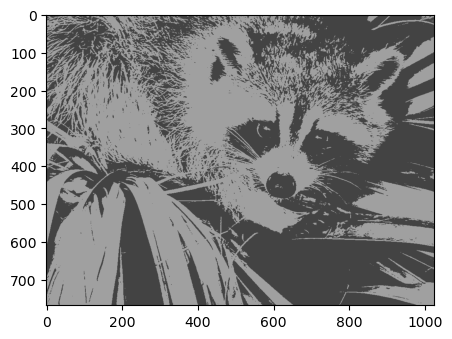

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import sys 
from sklearn import cluster

try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face

    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

path_fig_save = "/home/mrrobot/Documents/GitHub/AEM-ITESO/tema_5/"
n_clusters = 2
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

# original face
plt.figure(1, figsize=(5, 4.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)
plt.savefig(path_fig_save + "original.png", dpi=600)
# compressed face
plt.figure(2, figsize=(5, 4.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.savefig(path_fig_save + "comprimida.png", dpi=600)

# # histogram
# plt.figure(4, figsize=(3, 2.2))
# plt.clf()
# plt.axes([0.01, 0.01, 0.98, 0.98])
# plt.hist(X, bins=256, color=".5", edgecolor=".5")
# plt.yticks(())
# plt.xticks(regular_values)
# values = np.sort(values)
# for center_1, center_2 in zip(values[:-1], values[1:]):
#     plt.axvline(0.5 * (center_1 + center_2), color="b")

# for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
#     plt.axvline(0.5 * (center_1 + center_2), color="b", linestyle="--")

# plt.show()

In [ ]:
face.shape

(768, 1024)

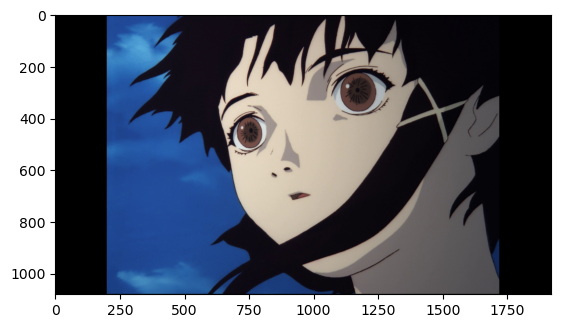

In [3]:
img_lain = img.imread('../tema_5/lain.png')
imgplot = plt.imshow(img_lain)

In [4]:
img_lain.shape

(1080, 1920, 3)

In [10]:
sys.getsizeof(img_lain) / (1024 * 1024) #MB in memory

23.730606079101562

In [15]:
n_clusters = 4
np.random.seed(0)

X = img_lain.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
img_lain_compressed = np.choose(labels, values)
img_lain_compressed.shape = img_lain.shape

vmin = img_lain.min()
vmax = img_lain.max()

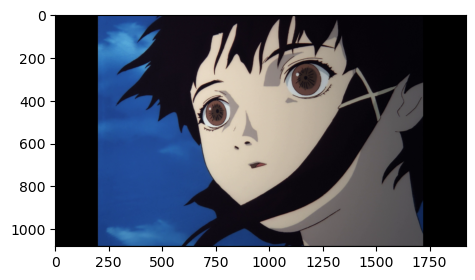

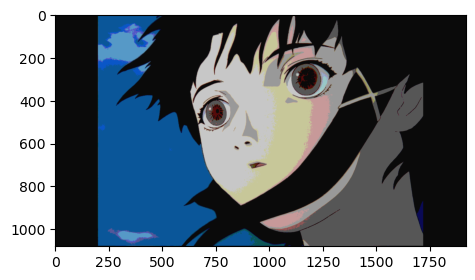

In [16]:
# original img_lain
plt.figure(1, figsize=(8, 3))
plt.imshow(img_lain, cmap=plt.cm.gray, vmin=vmin, vmax=256)
plt.savefig(path_fig_save + "lain_original.png", dpi=600)
plt.figure(2, figsize=(8, 3))
plt.imshow(img_lain_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.savefig(path_fig_save + "lain_comprimida.png", dpi=600)

In [19]:
original_size = round(
  os.path.getsize(path_fig_save + "lain_original.png") / 1024, 3
  )
comp_size = round(
  os.path.getsize(path_fig_save + "lain_comprimida.png") / 1024, 3
  )
print(
  f'Original: {original_size} kb \
    \nComprimida: {comp_size} kb \
    \nRatio: {round(comp_size/original_size, 2)}'
)

Original: 1902.673 kb     
Comprimida: 469.827 kb     
Ratio: 0.25
